In [871]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [872]:
def makeANN(inputLength):

    inputLayer = tf.keras.layers.Input(shape=(inputLength,))

    denseLayer1 = tf.keras.layers.Dense(128, activation='tanh')(inputLayer)
    dropoutLayer1 = tf.keras.layers.Dropout(rate=0.5)(denseLayer1)
 
    denseLayer2 = tf.keras.layers.Dense(64, activation='tanh')(dropoutLayer1)
    dropoutLayer2 = tf.keras.layers.Dropout(rate=0.5)(denseLayer2)

    outputLayer = tf.keras.layers.Dense(1, activation="linear")(dropoutLayer2)

    model = tf.keras.Model(inputs=inputLayer, outputs=outputLayer)
    return model

In [873]:
cleanedData = pd.read_csv('../Datasets/ESI_Clean.csv', header=1, nrows=None)

cleanedData

,Month-Year,Jan-05,Feb-05,Mar-05,Apr-05,May-05,Jun-05,Jul-05,Aug-05,Sep-05,...,May-22,Jun-22,Jul-22,Aug-22,Sep-22,Oct-22,Nov-22,Dec-22,Jan-23,Feb-23
0,EU.ESI,100.4,99.4,98.4,98.1,97.3,97.4,98.5,99.8,100.3,...,103.6,101.9,97.8,97.1,93.9,92.8,94.1,95.6,97.8,97.8
1,EA.ESI,100.1,98.9,97.9,97.8,96.7,96.9,98.2,99.2,99.9,...,104.2,103.0,98.6,97.8,94.4,93.8,95.1,97.1,99.8,99.7
2,BE.ESI,105.3,104.4,102.6,98.1,94.6,97.0,94.8,96.9,99.9,...,97.8,97.7,98.0,92.9,86.0,83.4,82.4,88.0,87.4,88.9
3,BG.ESI,112.4,106.2,106.3,108.1,108.7,112.4,109.9,101.7,107.3,...,95.0,98.7,100.0,99.4,99.4,100.1,103.4,103.5,101.6,102.1
4,CZ.ESI,108.9,108.6,105.4,105.2,108.0,105.9,110.2,106.9,109.1,...,97.0,95.0,89.5,87.7,89.5,83.9,82.2,83.3,88.5,92.0
5,DK.ESI,106.3,107.6,106.0,97.6,100.9,100.2,96.9,106.7,102.6,...,94.2,88.5,86.2,90.0,82.4,74.5,78.7,77.7,78.3,79.6
6,DE.ESI,94.1,92.9,90.7,91.4,92.1,91.4,92.8,94.2,95.3,...,106.6,104.6,99.4,97.0,92.7,91.6,92.9,95.3,97.8,97.9
7,EE.ESI,105.8,107.7,110.1,110.1,110.7,110.3,113.1,111.2,109.8,...,95.7,92.5,89.5,88.5,84.8,84.4,84.3,81.2,83.5,82.6
8,EL.ESI,103.7,103.2,102.2,102.4,101.9,100.4,100.2,101.5,102.4,...,107.4,104.2,100.5,100.7,105.7,99.0,101.6,103.7,105.9,107.5
9,ES.ESI,105.6,103.6,104.3,104.6,104.4,103.7,104.9,105.3,105.6,...,103.6,101.7,96.7,97.6,96.9,98.3,96.5,98.8,101.5,99.5


In [874]:
cleanedData = cleanedData.tail(cleanedData.shape[0]-2)
cleanedData.reset_index(drop=True, inplace=True)

cleanedData

,Month-Year,Jan-05,Feb-05,Mar-05,Apr-05,May-05,Jun-05,Jul-05,Aug-05,Sep-05,...,May-22,Jun-22,Jul-22,Aug-22,Sep-22,Oct-22,Nov-22,Dec-22,Jan-23,Feb-23
0,BE.ESI,105.3,104.4,102.6,98.1,94.6,97.0,94.8,96.9,99.9,...,97.8,97.7,98.0,92.9,86.0,83.4,82.4,88.0,87.4,88.9
1,BG.ESI,112.4,106.2,106.3,108.1,108.7,112.4,109.9,101.7,107.3,...,95.0,98.7,100.0,99.4,99.4,100.1,103.4,103.5,101.6,102.1
2,CZ.ESI,108.9,108.6,105.4,105.2,108.0,105.9,110.2,106.9,109.1,...,97.0,95.0,89.5,87.7,89.5,83.9,82.2,83.3,88.5,92.0
3,DK.ESI,106.3,107.6,106.0,97.6,100.9,100.2,96.9,106.7,102.6,...,94.2,88.5,86.2,90.0,82.4,74.5,78.7,77.7,78.3,79.6
4,DE.ESI,94.1,92.9,90.7,91.4,92.1,91.4,92.8,94.2,95.3,...,106.6,104.6,99.4,97.0,92.7,91.6,92.9,95.3,97.8,97.9
5,EE.ESI,105.8,107.7,110.1,110.1,110.7,110.3,113.1,111.2,109.8,...,95.7,92.5,89.5,88.5,84.8,84.4,84.3,81.2,83.5,82.6
6,EL.ESI,103.7,103.2,102.2,102.4,101.9,100.4,100.2,101.5,102.4,...,107.4,104.2,100.5,100.7,105.7,99.0,101.6,103.7,105.9,107.5
7,ES.ESI,105.6,103.6,104.3,104.6,104.4,103.7,104.9,105.3,105.6,...,103.6,101.7,96.7,97.6,96.9,98.3,96.5,98.8,101.5,99.5
8,FR.ESI,104.6,103.2,101.3,100.2,97.7,101.9,102.6,102.8,102.8,...,103.7,102.3,101.6,100.2,96.4,96.5,94.7,94.4,98.6,97.1
9,CY.ESI,103.9,103.4,103.4,101.5,102.7,102.5,100.4,100.1,100.6,...,98.4,96.6,99.0,96.4,101.8,101.3,100.5,102.6,104.0,105.6


In [875]:
validationAndTestSetsLength = int(0.15*len(cleanedData))

test = cleanedData.tail(validationAndTestSetsLength)
test.reset_index(drop=True, inplace=True)
cleanedData.drop(cleanedData.index[-validationAndTestSetsLength:], inplace=True)

validation = cleanedData.tail(validationAndTestSetsLength)
validation.reset_index(drop=True, inplace=True)
cleanedData.drop(cleanedData.index[-validationAndTestSetsLength:], inplace=True)

/Users/NunoAlberto/opt/anaconda3/envs/nilmtk-env/lib/python3.8/site-packages/pandas/core/frame.py:4110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [876]:
cleanedData

,Month-Year,Jan-05,Feb-05,Mar-05,Apr-05,May-05,Jun-05,Jul-05,Aug-05,Sep-05,...,May-22,Jun-22,Jul-22,Aug-22,Sep-22,Oct-22,Nov-22,Dec-22,Jan-23,Feb-23
0,BE.ESI,105.3,104.4,102.6,98.1,94.6,97.0,94.8,96.9,99.9,...,97.8,97.7,98.0,92.9,86.0,83.4,82.4,88.0,87.4,88.9
1,BG.ESI,112.4,106.2,106.3,108.1,108.7,112.4,109.9,101.7,107.3,...,95.0,98.7,100.0,99.4,99.4,100.1,103.4,103.5,101.6,102.1
2,CZ.ESI,108.9,108.6,105.4,105.2,108.0,105.9,110.2,106.9,109.1,...,97.0,95.0,89.5,87.7,89.5,83.9,82.2,83.3,88.5,92.0
3,DK.ESI,106.3,107.6,106.0,97.6,100.9,100.2,96.9,106.7,102.6,...,94.2,88.5,86.2,90.0,82.4,74.5,78.7,77.7,78.3,79.6
4,DE.ESI,94.1,92.9,90.7,91.4,92.1,91.4,92.8,94.2,95.3,...,106.6,104.6,99.4,97.0,92.7,91.6,92.9,95.3,97.8,97.9
5,EE.ESI,105.8,107.7,110.1,110.1,110.7,110.3,113.1,111.2,109.8,...,95.7,92.5,89.5,88.5,84.8,84.4,84.3,81.2,83.5,82.6
6,EL.ESI,103.7,103.2,102.2,102.4,101.9,100.4,100.2,101.5,102.4,...,107.4,104.2,100.5,100.7,105.7,99.0,101.6,103.7,105.9,107.5
7,ES.ESI,105.6,103.6,104.3,104.6,104.4,103.7,104.9,105.3,105.6,...,103.6,101.7,96.7,97.6,96.9,98.3,96.5,98.8,101.5,99.5
8,FR.ESI,104.6,103.2,101.3,100.2,97.7,101.9,102.6,102.8,102.8,...,103.7,102.3,101.6,100.2,96.4,96.5,94.7,94.4,98.6,97.1
9,CY.ESI,103.9,103.4,103.4,101.5,102.7,102.5,100.4,100.1,100.6,...,98.4,96.6,99.0,96.4,101.8,101.3,100.5,102.6,104.0,105.6


In [877]:
trainTarget = cleanedData.loc[:,"Feb-23"]

trainInput = cleanedData.drop(['Feb-23', 'Month-Year'], axis=1)
trainInput = trainInput.reset_index(drop=True)

In [878]:
trainTarget

0      88.9
1     102.1
2      92.0
3      79.6
4      97.9
5      82.6
6     107.5
7      99.5
8      97.1
9     105.6
10     95.2
11     94.6
12     97.9
13     94.1
14    104.6
15     97.5
16     94.9
17     89.8
Name: Feb-23, dtype: float64

In [879]:
trainInput

,Jan-05,Feb-05,Mar-05,Apr-05,May-05,Jun-05,Jul-05,Aug-05,Sep-05,Oct-05,...,Apr-22,May-22,Jun-22,Jul-22,Aug-22,Sep-22,Oct-22,Nov-22,Dec-22,Jan-23
0,105.3,104.4,102.6,98.1,94.6,97.0,94.8,96.9,99.9,104.2,...,101.3,97.8,97.7,98.0,92.9,86.0,83.4,82.4,88.0,87.4
1,112.4,106.2,106.3,108.1,108.7,112.4,109.9,101.7,107.3,103.4,...,95.7,95.0,98.7,100.0,99.4,99.4,100.1,103.4,103.5,101.6
2,108.9,108.6,105.4,105.2,108.0,105.9,110.2,106.9,109.1,110.0,...,93.3,97.0,95.0,89.5,87.7,89.5,83.9,82.2,83.3,88.5
3,106.3,107.6,106.0,97.6,100.9,100.2,96.9,106.7,102.6,107.2,...,98.4,94.2,88.5,86.2,90.0,82.4,74.5,78.7,77.7,78.3
4,94.1,92.9,90.7,91.4,92.1,91.4,92.8,94.2,95.3,96.6,...,106.3,106.6,104.6,99.4,97.0,92.7,91.6,92.9,95.3,97.8
5,105.8,107.7,110.1,110.1,110.7,110.3,113.1,111.2,109.8,114.1,...,99.0,95.7,92.5,89.5,88.5,84.8,84.4,84.3,81.2,83.5
6,103.7,103.2,102.2,102.4,101.9,100.4,100.2,101.5,102.4,102.0,...,103.9,107.4,104.2,100.5,100.7,105.7,99.0,101.6,103.7,105.9
7,105.6,103.6,104.3,104.6,104.4,103.7,104.9,105.3,105.6,106.3,...,100.1,103.6,101.7,96.7,97.6,96.9,98.3,96.5,98.8,101.5
8,104.6,103.2,101.3,100.2,97.7,101.9,102.6,102.8,102.8,103.2,...,102.1,103.7,102.3,101.6,100.2,96.4,96.5,94.7,94.4,98.6
9,103.9,103.4,103.4,101.5,102.7,102.5,100.4,100.1,100.6,98.6,...,97.4,98.4,96.6,99.0,96.4,101.8,101.3,100.5,102.6,104.0


In [880]:
maxTrainInput = np.max(trainInput.max())
print(maxTrainInput)

123.4


In [881]:
maxTrainTarget = np.max(trainTarget)
print(maxTrainTarget)

107.5


In [882]:
test

,Month-Year,Jan-05,Feb-05,Mar-05,Apr-05,May-05,Jun-05,Jul-05,Aug-05,Sep-05,...,May-22,Jun-22,Jul-22,Aug-22,Sep-22,Oct-22,Nov-22,Dec-22,Jan-23,Feb-23
0,SK.ESI,109.0,111.6,107.3,110.1,106.4,108.5,104.1,103.3,103.9,...,99.2,93.6,92.2,88.0,87.9,86.7,84.1,85.3,88.1,84.8
1,FI.ESI,105.1,103.9,103.8,102.6,102.9,106.8,111.7,111.7,107.4,...,99.3,96.9,92.2,88.9,85.0,85.2,83.7,82.5,87.2,86.2
2,SE.ESI,103.6,101.9,100.3,98.1,97.9,100.1,99.3,102.0,102.0,...,107.3,102.6,98.6,96.1,89.6,83.9,86.1,84.0,83.1,84.9


In [883]:
testTarget = test.loc[:,"Feb-23"]

testInput = test.drop(['Feb-23', 'Month-Year'], axis=1)
testInput = testInput.reset_index(drop=True)

In [884]:
testTarget

0    84.8
1    86.2
2    84.9
Name: Feb-23, dtype: float64

In [885]:
testInput

,Jan-05,Feb-05,Mar-05,Apr-05,May-05,Jun-05,Jul-05,Aug-05,Sep-05,Oct-05,...,Apr-22,May-22,Jun-22,Jul-22,Aug-22,Sep-22,Oct-22,Nov-22,Dec-22,Jan-23
0,109.0,111.6,107.3,110.1,106.4,108.5,104.1,103.3,103.9,104.4,...,91.9,99.2,93.6,92.2,88.0,87.9,86.7,84.1,85.3,88.1
1,105.1,103.9,103.8,102.6,102.9,106.8,111.7,111.7,107.4,109.4,...,101.0,99.3,96.9,92.2,88.9,85.0,85.2,83.7,82.5,87.2
2,103.6,101.9,100.3,98.1,97.9,100.1,99.3,102.0,102.0,103.2,...,108.2,107.3,102.6,98.6,96.1,89.6,83.9,86.1,84.0,83.1


In [886]:
validation

,Month-Year,Jan-05,Feb-05,Mar-05,Apr-05,May-05,Jun-05,Jul-05,Aug-05,Sep-05,...,May-22,Jun-22,Jul-22,Aug-22,Sep-22,Oct-22,Nov-22,Dec-22,Jan-23,Feb-23
0,PT.ESI,98.2,98.2,97.6,101.1,99.8,95.3,93.3,99.2,98.0,...,106.1,105.6,103.6,103.0,100.1,98.2,97.8,97.1,98.5,102.9
1,RO.ESI,114.4,104.2,107.3,100.0,108.5,99.8,107.1,105.7,102.5,...,101.9,101.8,101.9,100.6,101.9,102.4,104.7,102.1,100.7,101.7
2,SI.ESI,106.1,105.6,102.1,101.5,102.0,101.0,99.9,103.4,103.6,...,99.0,96.7,95.3,96.1,90.4,91.1,94.2,97.5,96.0,95.8


In [887]:
validationTarget = validation.loc[:,"Feb-23"]

validationInput = validation.drop(['Feb-23', 'Month-Year'], axis=1)
validationInput = validationInput.reset_index(drop=True)

In [888]:
validationTarget

0    102.9
1    101.7
2     95.8
Name: Feb-23, dtype: float64

In [889]:
validationInput

,Jan-05,Feb-05,Mar-05,Apr-05,May-05,Jun-05,Jul-05,Aug-05,Sep-05,Oct-05,...,Apr-22,May-22,Jun-22,Jul-22,Aug-22,Sep-22,Oct-22,Nov-22,Dec-22,Jan-23
0,98.2,98.2,97.6,101.1,99.8,95.3,93.3,99.2,98.0,101.4,...,106.2,106.1,105.6,103.6,103.0,100.1,98.2,97.8,97.1,98.5
1,114.4,104.2,107.3,100.0,108.5,99.8,107.1,105.7,102.5,105.6,...,103.5,101.9,101.8,101.9,100.6,101.9,102.4,104.7,102.1,100.7
2,106.1,105.6,102.1,101.5,102.0,101.0,99.9,103.4,103.6,104.3,...,101.8,99.0,96.7,95.3,96.1,90.4,91.1,94.2,97.5,96.0


In [890]:
trainInput = trainInput/maxTrainInput
trainTarget = trainTarget/maxTrainTarget
validationInput = validationInput/maxTrainInput
validationTarget = validationTarget/maxTrainTarget
testInput = testInput/maxTrainInput
testTarget = testTarget/maxTrainTarget

In [891]:
ann = makeANN(217)
ann.compile(optimizer="adam", loss="mse", metrics=["mse", "mae"]) 
earlyStopping = tf.keras.callbacks.EarlyStopping(patience=10, verbose=1, restore_best_weights=True)

ann.summary()

lossCurves = ann.fit(x = np.asarray(trainInput).astype('float32'), 
                     y = np.asarray(trainTarget).astype('float32'),
                     epochs = 1000,
                     verbose = 1,
                     callbacks=[earlyStopping],
                     validation_data = (validationInput, validationTarget))

Model: "model_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 217)]             0         
                                                                 
 dense_87 (Dense)            (None, 128)               27904     
                                                                 
 dropout_58 (Dropout)        (None, 128)               0         
                                                                 
 dense_88 (Dense)            (None, 64)                8256      
                                                                 
 dropout_59 (Dropout)        (None, 64)                0         
                                                                 
 dense_89 (Dense)            (None, 1)                 65        
                                                                 
Total params: 36,225
Trainable params: 36,225
Non-trainabl

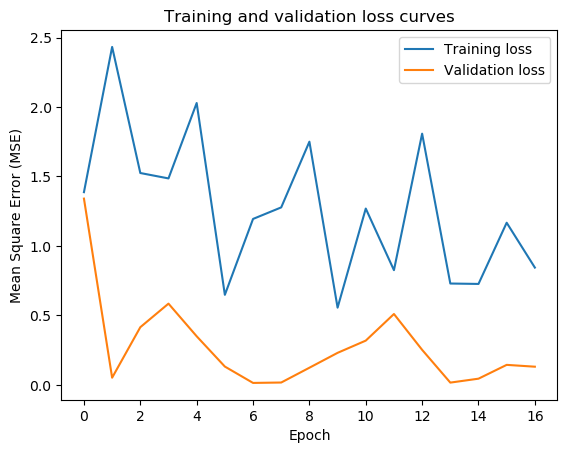

In [892]:
plt.plot(lossCurves.history["loss"], label="Training loss")
plt.plot(lossCurves.history["val_loss"], label="Validation loss")
plt.title('Training and validation loss curves')
plt.ylabel('Mean Square Error (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [893]:
predictions = ann.predict(x=testInput, verbose=1)

performanceMetrics = ann.evaluate(x=testInput, y=testTarget)

1/1 [==============================] - 0s 21ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0364


In [894]:
print(performanceMetrics)

[0.002871723147109151, 0.002871723147109151, 0.03637389466166496]


In [895]:
print(predictions*maxTrainTarget)

[[94.67199]
 [87.56271]
 [84.40412]]


In [896]:
print(testTarget*maxTrainTarget)

0    84.8
1    86.2
2    84.9
Name: Feb-23, dtype: float64


In [897]:
def mae(predictions, groundTruth):
    mae = 0
    for index in range(len(predictions)):
        mae += abs(groundTruth[index] - predictions[index])
        
    return mae / len(predictions)

def rmse(predictions, groundTruth):
    rmse = 0
    for index in range(len(predictions)):
        rmse += (groundTruth[index] - predictions[index])**2
    rmse = rmse / len(predictions)
        
    return np.sqrt(rmse)

In [898]:
print("MAE: " + str(mae(predictions*maxTrainTarget, testTarget*maxTrainTarget)))
print("RMSE: " + str(rmse(predictions*maxTrainTarget, testTarget*maxTrainTarget)))

MAE: [3.9101944]
RMSE: [5.7607584]


In [899]:
annPath = "../models/" + "trainedANN_ESI.h5"

if not os.path.exists (annPath):
    open((annPath), 'a').close()

ann.save(annPath)

In [900]:
"""loadedANN = tf.keras.models.load_model(annPath)

predictions = loadedANN.predict(x=testInput, verbose=1)

performanceMetrics = loadedANN.evaluate(x=testInput, y=testTarget)

print(performanceMetrics)

print(predictions*maxTrainTarget)

print(testTarget*maxTrainTarget)"""

'loadedANN = tf.keras.models.load_model(annPath)\n\npredictions = loadedANN.predict(x=testInput, verbose=1)\n\nperformanceMetrics = loadedANN.evaluate(x=testInput, y=testTarget)\n\nprint(performanceMetrics)\n\nprint(predictions*maxTrainTarget)\n\nprint(testTarget*maxTrainTarget)'